The idea of the program in simple terms

We have data points (X and y) 

We want to draw a straight line that best represents the relationship between area and price.

The equation we’re looking for is:

y=W⋅X+b

* W is the slope of the line.

* b is the intercept (where the line crosses the y-axis).

Our goal: choose W and b so that the line is as close as possible to all points.



How do we know if the line is good or not?

We calculate the error between our predictions (y_pred) and the actual values (y).

We use the MSE (Mean Squared Error) formula to measure overall error:

MSE= (1/n)∑(ypred−y)^2
 
​
We square the errors so that negative and positive differences don’t cancel each other out.



How do we adjust the line to make it better?

This is where Gradient Descent comes in:

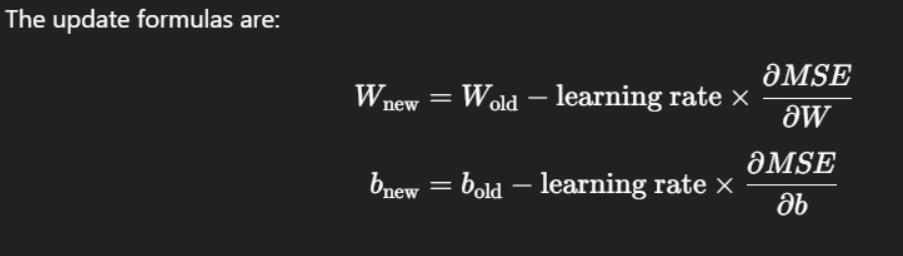

###  What is Mini-Batch?

If we have a huge dataset, it’s not practical to calculate the error using all the data each time.
Instead, we take a small random portion (batch) — for example 20 points out of 1000 — and update the line using only that batch.
This speeds up training.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
def MSEStep(X, y, W, b, learn_rate=0.005):
   
    """
    Perform one step of gradient descent to update linear regression coefficients.

    Parameters:
        X : np.array : feature data (mini-batch)
        y : np.array : true target values (mini-batch)
        W : np.array : current weights
        b : float : current bias (intercept)
        learn_rate : float : learning rate

    Returns:
        W_new : np.array : updated weights
        b_new : float : updated bias
    """
    y_pred = np.matmul(X, W) + b               # Predictions
    error = y_pred - y                         # Error
    W_grad = (2 / len(y)) * np.matmul(X.T, error)  # Gradient w.r.t W
    b_grad = (2 / len(y)) * np.sum(error)          # Gradient w.r.t b
    W_new = W - learn_rate * W_grad            # Update weights
    b_new = b - learn_rate * b_grad            # Update bias
    return W_new, b_new


In [ ]:
def miniBatchGD(X, y, batch_size=20, learn_rate=0.005, num_iter=25):
    """
   Run mini-batch gradient descent to learn linear regression coefficients.

   Repeats 25 times:

   Selects 20 random points from the data (mini-batch)

   Calculates predictions: y_pred = X_batch * W + b

   Finds the errors (y_pred - y_batch)

   Calculates the gradient, which tells us how to adjust W and b

   Updates W and b by taking a small step in the right direction

    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1])     # Initialize weights to zeros
    b = 0                        # Initialize bias to zero
    regression_coef = [np.hstack((W, b))]  # Store initial (W, b)

    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)  # Sample batch
        X_batch = X[batch, :]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)      # Update parameters
        regression_coef.append(np.hstack((W, b)))               # Store current (W, b)

    return regression_coef


Reads the data from data.csv and splits it into:

X (features)

y (target values)

In [ ]:
# Load dataset
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

# Reshape X to ensure it's a 2D column vector
X = X.reshape(-1, 1)


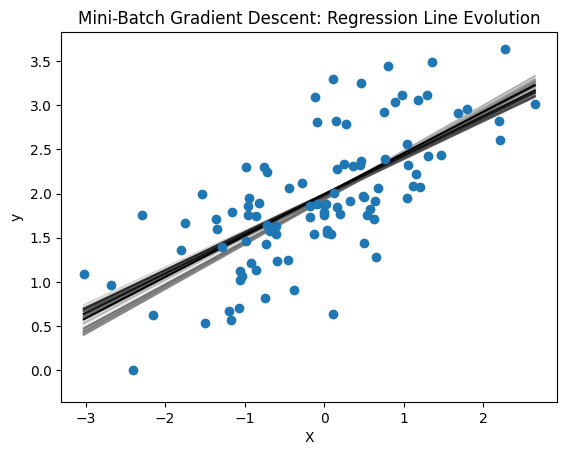

In [ ]:
# Run mini-batch gradient descent with improved parameters
regression_coef = miniBatchGD(X, y, batch_size=20, learn_rate=0.05, num_iter=300)


# Plot the regression line evolution
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)

# Plot each regression line with gradually darkening color
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]  # Fade-in effect
    plt.plot([X_min, X_max], [X_min * W + b, X_max * W + b], color=color)

# Plot original data points
plt.scatter(X, y, zorder=3)
plt.title("Mini-Batch Gradient Descent: Regression Line Evolution")
plt.xlabel("X")
plt.ylabel("y")
plt.show()